# Лабораторна робота 8 (1 частина)

Романенко Ілля ФІТ 4-7

!!! ця робота була виконана локально, тому файл моделі був збережений також локально

In [1]:
# !pip install tensorflow
# !pip install --upgrade keras
# !pip install keras-tuner

In [2]:
import numpy as np
from tensorflow import keras

2024-10-09 16:03:51.198133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 16:03:51.215799: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 16:03:51.220736: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 16:03:51.233292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-09 16:03:52.137529: W tensorflow/compiler/tf2

## Крок 1

завантажуємо датасет

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Крок 2

роздрукуємо перші 10 зображень

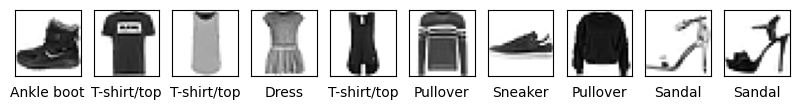

In [4]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))

for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

plt.show()

## Крок 3

підготуємо дані

In [5]:
from keras.utils import to_categorical

x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Крок 3

Побудуємо архітектуру моделі

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(392, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(196, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

/home/user/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Крок 4

використаємо ранню зупинку і зменшення швидкості

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

## Крок 5

виведем архітектуру моделі

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 392)            │       307,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 392)            │         1,568 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 392)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 196)            │        77,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 196)            │           784 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 196)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        12,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 400,614 (1.53 MB)

 Trainable params: 399,310 (1.52 MB)

 Non-trainable params: 1,304 (5.09 KB)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Крок 6

натренуємо модель

In [10]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.7544 - loss: 0.7150 - val_accuracy: 0.8101 - val_loss: 0.5580 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8326 - loss: 0.4650 - val_accuracy: 0.8290 - val_loss: 0.4675 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8403 - loss: 0.4435 - val_accuracy: 0.8542 - val_loss: 0.4542 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8542 - loss: 0.4034 - val_accuracy: 0.8627 - val_loss: 0.4562 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8587 - loss: 0.3917 - val_accuracy: 0.8663 - val_loss: 0.4464 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8603 - loss: 0.3890 - val_accuracy: 0.8663 - val_loss: 0.4920 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8639 - 

оцінимо точність моделі

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Тестова точність: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8778 - loss: 0.4053
Тестова точність: 0.8794000148773193


## Крок 7

збережемо модель

In [12]:
from datetime import datetime


save_date = datetime.now().strftime("%S_%M_%H_%d_%m_%Y")
model_name_path = f'models/mnist_model_{save_date}.keras'

In [13]:
# збережемо модель на google drive, якщо виконається в колабі
# лабораторна в кінці кінців виконувалася на локальній машині

# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
model.save(model_name_path) #збережемо модель локально

## Крок 8

побудуємо графіки функції втрат та точності моделі

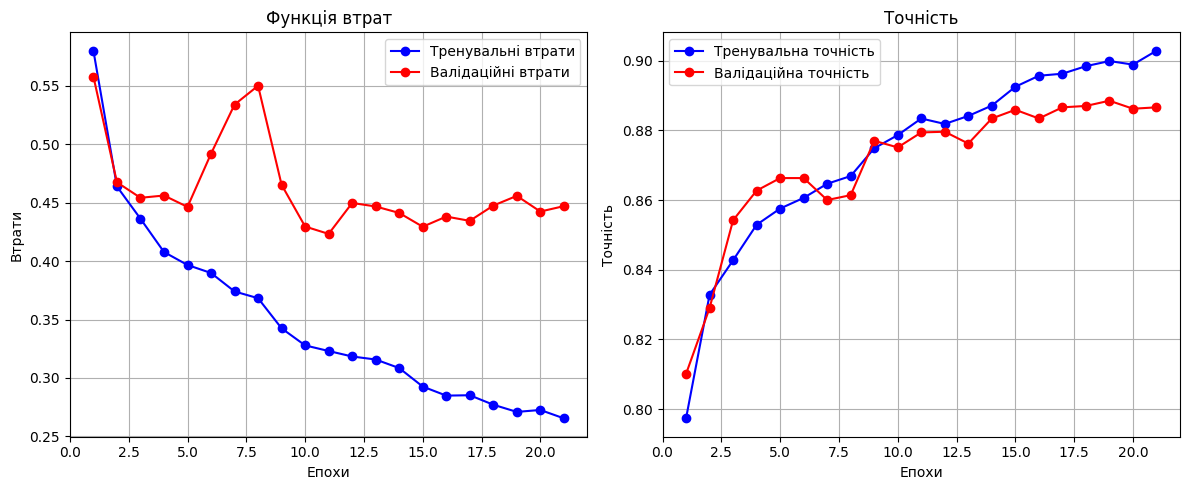

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Тренувальні втрати')
plt.plot(epochs, val_loss, 'ro-', label='Валідаційні втрати')
plt.title('Функція втрат')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Тренувальна точність')
plt.plot(epochs, val_accuracy, 'ro-', label='Валідаційна точність')
plt.title('Точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Крок 9

виведемо класифікаційний звіт

In [16]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)
print(classification_report(y_true, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.85      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.78      0.82      0.80      1000
       Dress       0.89      0.87      0.88      1000
        Coat       0.80      0.80      0.80      1000
      Sandal       0.97      0.93      0.95      1000
       Shirt       0.72      0.67      0.69      1000
     Sneaker       0.93      0.96      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Крок 10

In [19]:
import pandas as pd

results = pd.DataFrame({'True Label': y_true, 'Predicted Label': y_pred})
print(results.head(10))

   True Label  Predicted Label
0           9                9
1           2                2
2           1                1
3           1                1
4           6                6
5           1                1
6           4                0
7           6                6
8           5                5
9           7                7


## Висновки

Натренована модель показала загалом задовільний результат. Тестова точність 0.87, що загалом, є непоганим результатом. Нейронка має певні проблеми з розпізнаванням класів 'shirt' та 'Pullover', найкраще вона розпізнає класи 'Trouser' та 'Bag'.

По графіку точності можемо побачити доволі стабільний приріст, тому за необхдіності, можна було б продовжити тренування, збільшивши параметр patience для раньої зупинки